# Table of Contents
* [Loading and Visualizing Iris Dataset](#Loading-and-Visualizing-Iris-Dataset)
* [Implementing a Perceptron over the Iris Dataset](#Implementing-a-Perceptron-over-the-Iris-Dataset)
* [Linear vs Logistic Regression over the Iris Dataset](#Linear-vs-Logistic-Regression-over-the-Iris-Dataset)

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats.stats import pearsonr

%matplotlib notebook

In [2]:
# code originates from "Python Machine Learning" by Sebastian Raschka, September 2015
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=100, label='test set',
                    edgecolor='black')

## Loading and Visualizing Iris Dataset
* [Back to Top](#Table-of-Contents)

In [3]:
# loading the iris dataset and visualizing using pandas
iris = datasets.load_iris()
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
X = iris.data
y = iris.target

<IPython.core.display.Javascript object>


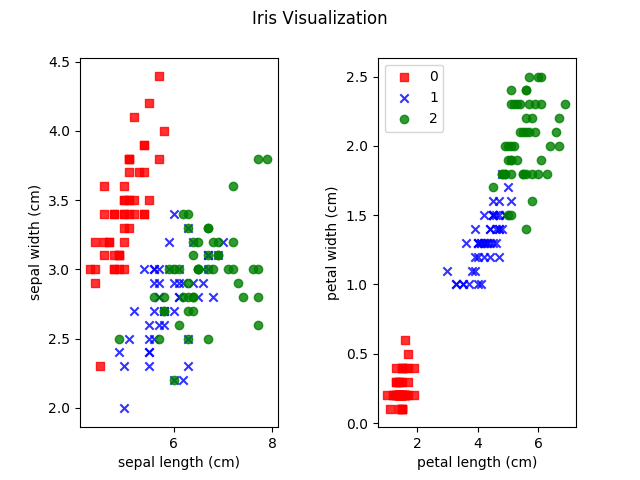

In [5]:
plt.close()
markers = ['s', 'x', 'o']
colors = ['red', 'blue', 'green']
cmap = ListedColormap(colors[:len(np.unique(y))])

fig, (ax1, ax2) = plt.subplots(1, 2)

for idx, cl in enumerate(np.unique(y)):
    ax1.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    ax2.scatter(x=X[y == cl, 2], y=X[y == cl, 3],
               alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

fig.suptitle('Iris Visualization')
plt.subplots_adjust(wspace=0.5)
ax1.set_xlabel(df_iris.columns[0])
ax1.set_ylabel(df_iris.columns[1])
ax2.set_xlabel(df_iris.columns[2])
ax2.set_ylabel(df_iris.columns[3])
ax2.legend()
plt.show()

#### Here we can see petal length and petal width appear to be more separable than sepal width or sepal length. So we will use these two features for our simple classifiers.
<br />
<br />

## Implementing a Perceptron over the Iris Dataset
* [Back to Top](#Table-of-Contents)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

In [7]:
X = X[:, (2,3)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Size of training set: %d   Size of test set: %d' % (len(X_train), len(X_test)))

Size of training set: 105   Size of test set: 45


In [8]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [10]:
y_pred = ppn.predict(X_test_std)
print('Training Accuracy: %f' % (ppn.score(X_train_std, y_train)))
print('Incorrect test predictions: %d' % (y_test != y_pred).sum())

Training Accuracy: 0.904762
Incorrect test predictions: 4


In [11]:
X_comb_std = np.vstack((X_train_std, X_test_std))
y_comb = np.hstack((y_train, y_test))

<IPython.core.display.Javascript object>


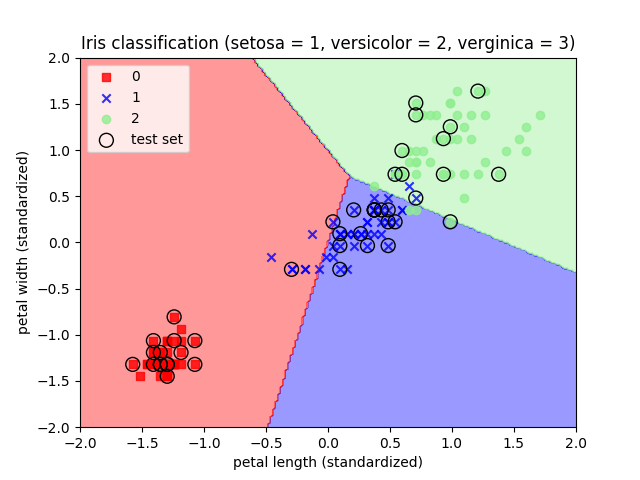

In [12]:
plt.close()
plot_decision_regions(X=X_comb_std, y=y_comb, classifier=ppn, test_idx=range(105, 150))
plt.xlim((-2,2))
plt.ylim((-2,2))
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.title("Iris classification (setosa = 1, versicolor = 2, verginica = 3)")
plt.legend()
plt.show()

### Testing accuracy by number of max iterations
* [Back to Top](#Table-of-Contents)

[[  5.           0.93333333]
 [ 10.           0.66666667]
 [ 15.           0.97777778]
 [ 20.           0.66666667]
 [ 25.           0.71111111]
 [ 30.           0.95555556]
 [ 35.           0.95555556]
 [ 40.           0.91111111]
 [ 45.           0.97777778]
 [ 50.           0.73333333]
 [ 55.           0.95555556]
 [ 60.           0.97777778]]


<IPython.core.display.Javascript object>


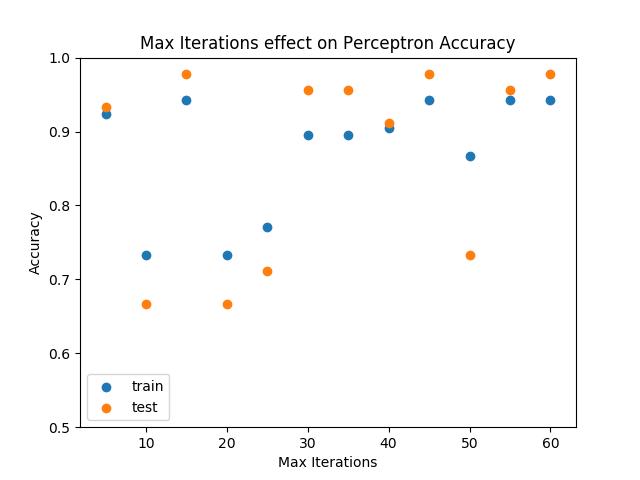

In [13]:
plt.close()
train_score, test_score = [], []
for i in range(5, 65, 5):
    ppn = Perceptron(max_iter=i, eta0=0.1, random_state=0)
    ppn.fit(X_train_std, y_train)
    train_score.append((i, ppn.score(X_train_std, y_train)))
    test_score.append((i, ppn.score(X_test_std, y_test)))

train_score, test_score = np.array(train_score), np.array(test_score)
print(test_score)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x=train_score[:, 0], y=train_score[:, 1], label='train')
ax.scatter(x=test_score[:, 0], y=test_score[:, 1], label='test')
ax.set_xlabel('Max Iterations')
ax.set_ylabel('Accuracy')
ax.set_title('Max Iterations effect on Perceptron Accuracy')
ax.set_ylim([0.5, 1.])
ax.legend()
plt.show()

In [14]:
print('Correlation between iterations and training accuracy %f' % (pearsonr(train_score[:, 0], train_score[:, 1])[0]))
print('Correlation between iterations and test accuracy %f' % (pearsonr(test_score[:, 0], test_score[:, 1])[0]))

Correlation between iterations and training accuracy 0.464340
Correlation between iterations and test accuracy 0.339740


#### Low correlation between number of iterations and accuracy. Max iterations should be optimized for each case.
<br />
<br />

#### Learning rates don't have any effect on perceptron accuracy. This is because a learning rate for a perceptron will only effect the scaling of the weights and not affect the feature importance. The next plot shows this for learning rates ranging from 10<sup>-5</sup> to 10<sup>5</sup>.

<IPython.core.display.Javascript object>


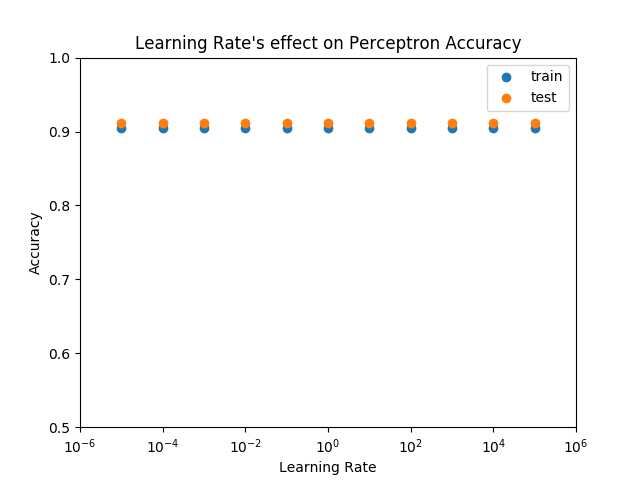

In [48]:
plt.close()
train_score, test_score = [], []
for i in range(-5, 6):
    ppn = Perceptron(max_iter=40, eta0=10**i, random_state=0)
    ppn.fit(X_train_std, y_train)
    train_score.append((10**i, ppn.score(X_train_std, y_train)))
    test_score.append((10**i, ppn.score(X_test_std, y_test)))

train_score, test_score = np.array(train_score), np.array(test_score)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x=train_score[:, 0], y=train_score[:, 1], label='train')
ax.scatter(x=test_score[:, 0], y=test_score[:, 1], label='test')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Accuracy')
ax.set_title("Learning Rate's effect on Perceptron Accuracy")
ax.set_ylim([0.5, 1.])
ax.set_xlim([10**-6, 10**6])
ax.legend()
plt.xscale('log')
plt.show()

<br />
<br />
## Linear vs Logistic Regression over the Iris Dataset
* [Back to Top](#Table-of-Contents)

In [23]:
from sklearn import linear_model

In [24]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
print('Training Accuracy: %f' % (linreg.score(X_train_std, y_train)))
print('Test Accuracy: %f' % (linreg.score(X_test_std, y_test)))

Training Accuracy: 0.931217
Test Accuracy: 0.906552


<IPython.core.display.Javascript object>


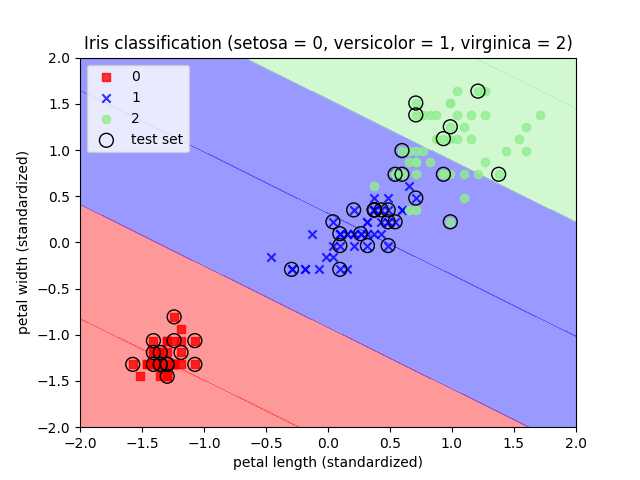

In [26]:
plt.close()
plot_decision_regions(X=X_comb_std, y=y_comb, classifier=linreg, test_idx=range(105, 150))
plt.xlim((-2,2))
plt.ylim((-2,2))
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.title("Iris classification (setosa = 0, versicolor = 1, virginica = 2)")
plt.legend()
plt.show()

#### Using a standard least-squares linear regression does not separate the versicolor and virginica very well.
<br />
<br />

In [51]:
logreg = linear_model.LogisticRegression(C=10**2)
logreg.fit(X_train_std, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
print('Training Accuracy: %f' % (logreg.score(X_train_std, y_train)))
print('Test Accuracy: %f' % (logreg.score(X_test_std, y_test)))

Training Accuracy: 0.961905
Test Accuracy: 0.977778


<IPython.core.display.Javascript object>


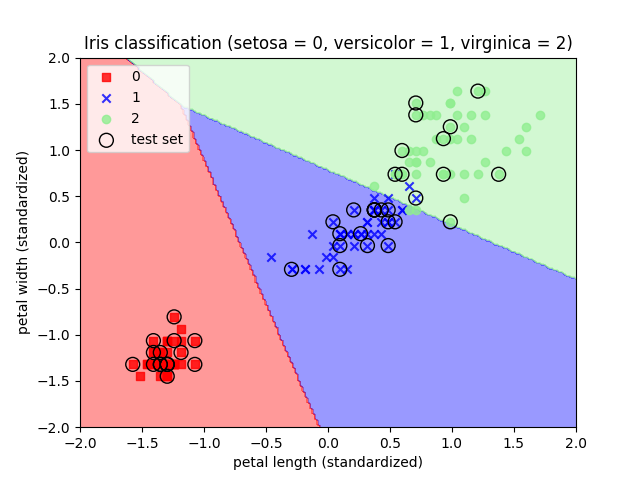

In [53]:
plt.close()
plot_decision_regions(X=X_comb_std, y=y_comb, classifier=logreg, test_idx=range(105, 150))
plt.xlim((-2,2))
plt.ylim((-2,2))
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.title("Iris classification (setosa = 0, versicolor = 1, virginica = 2)")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


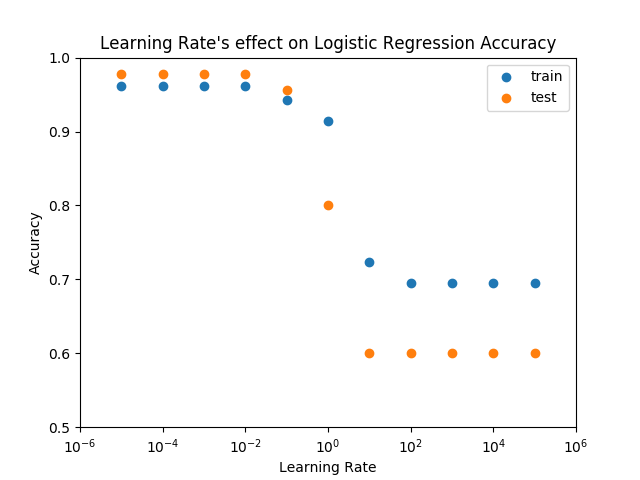

In [54]:
plt.close()
train_score, test_score = [], []
for i in range(-5, 6):
    logreg = LogisticRegression(C=10**i, random_state=0)
    logreg.fit(X_train_std, y_train)
    train_score.append((1/10**i, logreg.score(X_train_std, y_train)))
    test_score.append((1/10**i, logreg.score(X_test_std, y_test)))

train_score, test_score = np.array(train_score), np.array(test_score)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x=train_score[:, 0], y=train_score[:, 1], label='train')
ax.scatter(x=test_score[:, 0], y=test_score[:, 1], label='test')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Accuracy')
ax.set_title("Learning Rate's effect on Logistic Regression Accuracy")
ax.set_ylim([0.5, 1.])
ax.set_xlim([10**-6, 10**6])
ax.legend()
plt.xscale('log')
plt.show()